# Deep Learning
## Actividad 1: Deep Vision

Nombre alumn@ 1 : Francisco Simarro

Nombre alumn@ 2 : Santiago Bima


# Actividad Deep Vision

Diseñar y comparar dos estrategias para la clasificación de imágenes en el dataset CIFAR100 de Keras (https://keras.io/api/datasets/cifar100/)



Recomendaciones en el Uso de Colab:

- Eliminar las variables innecesarias para liberar RAM mediante la sentencia:

# 1.Redes Pre-Entrenadas

##Introduccion

Para realizar esta practica entregable hemos tenido que hacer uso de Google Colab Pro para poder tener rendimientos optimos y mayor capacidad de computo para realizar todas las estrategias

###Dataset CIFAR100

In [1]:
#El conjunto de datos CIFAR-100 (Instituto Canadiense de Investigación Avanzada, 100 clases)
#es un subconjunto del conjunto de datos Tiny Images y consta de 60000 imágenes en color de 32x32.
#Las 100 clases del CIFAR-100 se agrupan en 20 superclases. Hay 600 imágenes por clase.
#Cada imagen viene con una etiqueta "fine" (la clase a la que pertenece)
#y una etiqueta "coarse" (la superclase a la que pertenece).
#Hay 500 imágenes de entrenamiento y 10000 imágenes de test.

### Importacion de librerias

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dropout, GlobalAveragePooling2D
from keras.regularizers import l1
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.metrics import classification_report
from tensorflow.keras.applications.mobilenet import preprocess_input
tf.__version__

2024-02-07 18:12:51.751974: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-07 18:12:51.752078: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-07 18:12:51.884354: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


'2.15.0'

### Cargando el conjunto de datos

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar100.load_data(label_mode="fine")

169001437/169001437 [==============================] - 3s 0us/step


In [4]:
# CIFAR100 labelnames
labelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

In [5]:
print(f'shape de x_train is :{x_train.shape}','\t',f'shape de y_train is :{y_train.shape}','\n',
     f'shape de x_test is :{x_test.shape}','\t',f'shape de y_test is :{y_test.shape}')

shape de x_train is :(50000, 32, 32, 3) 	 shape de y_train is :(50000, 1) 
 shape de x_test is :(10000, 32, 32, 3) 	 shape de y_test is :(10000, 1)


### Definicion de procedimientos

In [6]:
#Modulo realizado para mostrar la imagen y la label asociada
def display_images(num, x_train, y_train, labelNames):
    image = x_train[num]  # La imagen ya está en 32x32x3, no es necesario cambiar la forma

    # Obtener la etiqueta como un número entero y luego obtener el nombre de la etiqueta correspondiente
    label_index = int(y_train[num])
    label_name = labelNames[label_index]


    plt.title(f'Example: {num}  Label: {label_name} ({label_index})')
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [7]:
def display_unique_labels(y_train, labelNames):
    # Obtener las etiquetas únicas en y_train
    unique_labels = np.unique(y_train)

    # Imprimir la cantidad de etiquetas únicas
    print(f"Las {len(unique_labels)} clases son: ")

    for label_index in unique_labels:
        print(f"Índice: {label_index}, Nombre de la etiqueta: {labelNames[label_index]}")

### Inspeccion de los datos

#### Valores max , min de los dataset de train y test

In [8]:
x_train.min()

0

In [9]:
x_train.max()

255

In [10]:
x_test.min()

0

In [11]:
x_test.max()

255

In [12]:
len(labelNames)

100

####Chequeo del conjunto de datos train y test

In [13]:
#Los datos, y las etiquetas
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [14]:
x_test

array([[[[199, 215, 249],
         [196, 211, 244],
         [195, 210, 243],
         ...,
         [216, 231, 250],
         [217, 231, 250],
         [224, 234, 252]],

        [[197, 210, 239],
         [195, 208, 238],
         [195, 210, 240],
         ...,
         [231, 243, 250],
         [233, 243, 250],
         [241, 245, 253]],

        [[222, 226, 246],
         [213, 220, 242],
         [209, 219, 243],
         ...,
         [243, 250, 251],
         [244, 249, 251],
         [250, 250, 253]],

        ...,

        [[ 72,  73,  99],
         [ 71,  74, 102],
         [ 74,  78, 108],
         ...,
         [220, 208, 217],
         [183, 168, 181],
         [155, 141, 150]],

        [[ 72,  75, 104],
         [ 76,  81, 111],
         [ 84,  89, 122],
         ...,
         [222, 212, 220],
         [187, 174, 192],
         [145, 132, 149]],

        [[ 80,  85, 118],
         [ 84,  90, 123],
         [ 85,  92, 127],
         ...,
         [217, 207, 215],
        

In [15]:
y_test

array([[49],
       [33],
       [72],
       ...,
       [51],
       [42],
       [70]])

In [16]:
x_train

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [195, 205, 193],
         [212, 224, 204],
         [182, 194, 167]],

        [[255, 255, 255],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [170, 176, 150],
         [161, 168, 130],
         [146, 154, 113]],

        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [189, 199, 169],
         [166, 178, 130],
         [121, 133,  87]],

        ...,

        [[148, 185,  79],
         [142, 182,  57],
         [140, 179,  60],
         ...,
         [ 30,  17,   1],
         [ 65,  62,  15],
         [ 76,  77,  20]],

        [[122, 157,  66],
         [120, 155,  58],
         [126, 160,  71],
         ...,
         [ 22,  16,   3],
         [ 97, 112,  56],
         [141, 161,  87]],

        [[ 87, 122,  41],
         [ 88, 122,  39],
         [101, 134,  56],
         ...,
         [ 34,  36,  10],
        

In [17]:
y_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [18]:
print(y_train[81])  #check de posicion random numero 81 (antes)

[64]


#### Labels Vs Indices

In [19]:
# Llamar a la función display_unique_labels con y_train y labelNames como argumentos
display_unique_labels(y_train, labelNames)


Las 100 clases son: 
Índice: 0, Nombre de la etiqueta: apple
Índice: 1, Nombre de la etiqueta: aquarium_fish
Índice: 2, Nombre de la etiqueta: baby
Índice: 3, Nombre de la etiqueta: bear
Índice: 4, Nombre de la etiqueta: beaver
Índice: 5, Nombre de la etiqueta: bed
Índice: 6, Nombre de la etiqueta: bee
Índice: 7, Nombre de la etiqueta: beetle
Índice: 8, Nombre de la etiqueta: bicycle
Índice: 9, Nombre de la etiqueta: bottle
Índice: 10, Nombre de la etiqueta: bowl
Índice: 11, Nombre de la etiqueta: boy
Índice: 12, Nombre de la etiqueta: bridge
Índice: 13, Nombre de la etiqueta: bus
Índice: 14, Nombre de la etiqueta: butterfly
Índice: 15, Nombre de la etiqueta: camel
Índice: 16, Nombre de la etiqueta: can
Índice: 17, Nombre de la etiqueta: castle
Índice: 18, Nombre de la etiqueta: caterpillar
Índice: 19, Nombre de la etiqueta: cattle
Índice: 20, Nombre de la etiqueta: chair
Índice: 21, Nombre de la etiqueta: chimpanzee
Índice: 22, Nombre de la etiqueta: clock
Índice: 23, Nombre de la eti

####Cantidad de Muestras por clases

[Text(0.5, 1.0, 'Número de muestras por clase'),
 Text(0, 0.5, 'Número de muestras')]

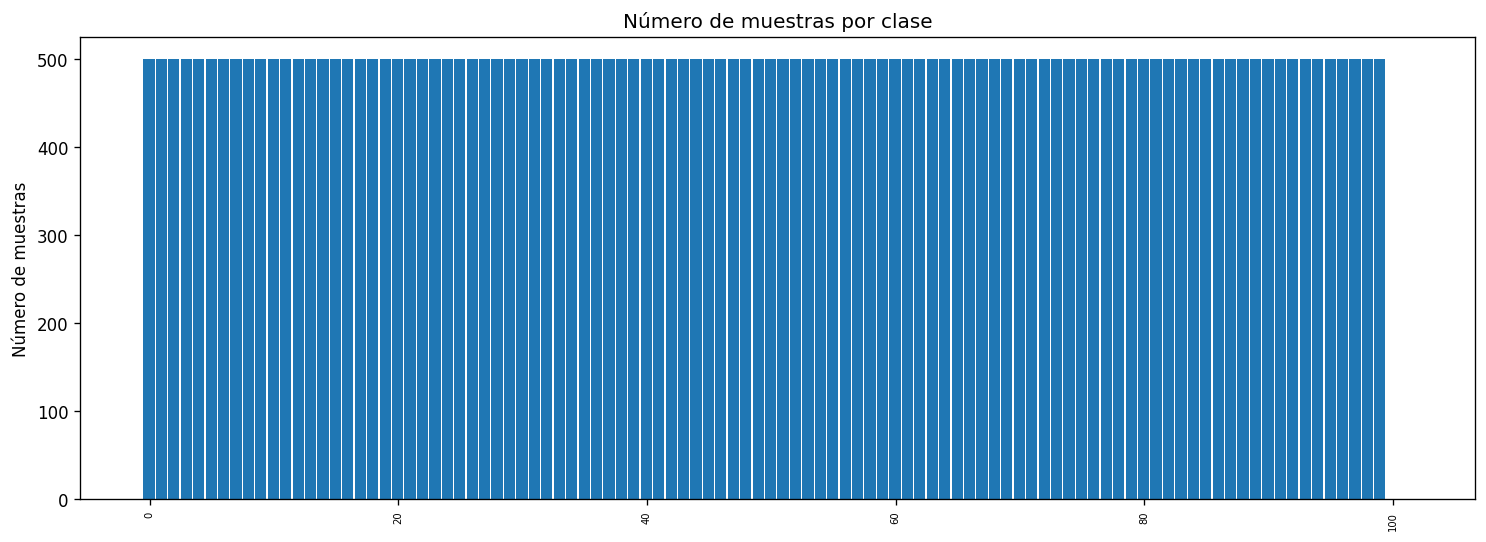

In [20]:
#Chequeo para confirmar que todas las imagenes estan compuestas por 100 clases

plt.rcParams.update({'figure.figsize':(15,5), 'figure.dpi':120})

# Plot Histograma x
plt.hist(y_train, bins=range(0,103), width=0.9, align='left')
plt.xticks(rotation = 90, size=6)
plt.gca().set(title='Número de muestras por clase', ylabel='Número de muestras')

### Visualizacion de los datos

/tmp/ipykernel_26/3284435269.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[num])


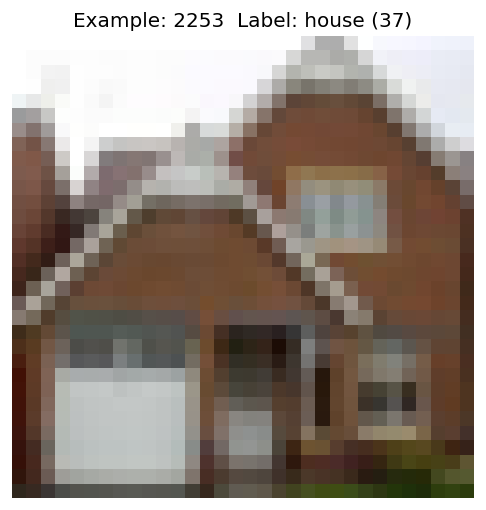

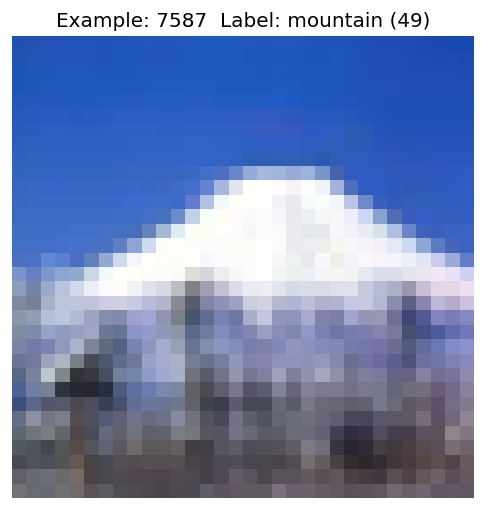

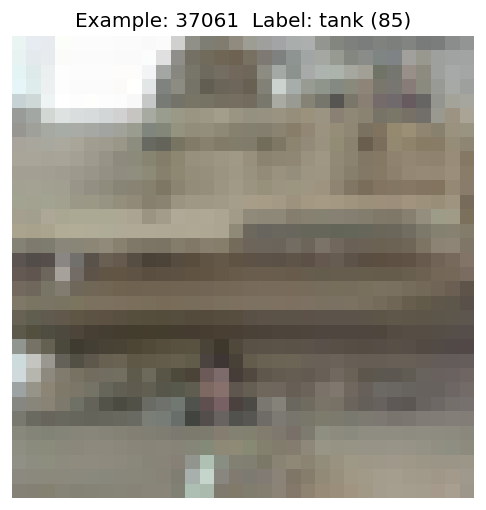

In [21]:
# Mostramos ejemplos de manera random
display_images(np.random.randint(0, x_train.shape[0]), x_train, y_train, labelNames)
display_images(np.random.randint(0, x_train.shape[0]), x_train, y_train, labelNames)
display_images(np.random.randint(0, x_train.shape[0]), x_train, y_train, labelNames)


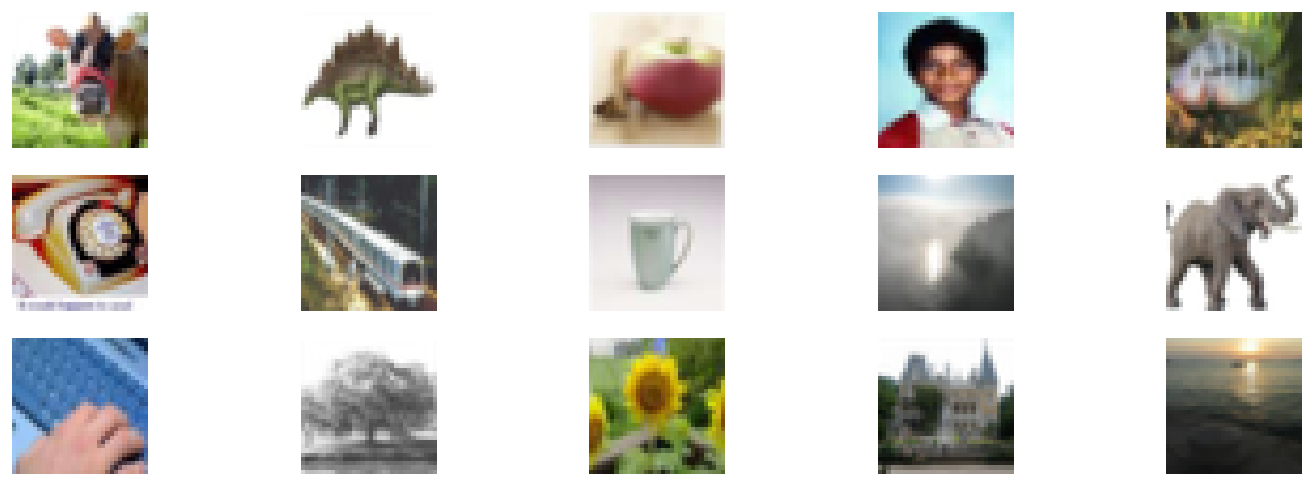

In [22]:
# Mostramos 15 muestras del dataset
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')


## Estrategia 1: MobileNetV2

In [23]:
# Se realizara un analisis de transfer learning haciendo uso de la arquitectura
#de red preentrenada MobileNetV2,
#Para las acciones de preprocesado y MobileNetV2 function se ha tenido la documentacion que a continuacion detallamos
# https://keras.io/api/applications/mobilenet/#mobilenetv2-function

###Preprocesado

In [24]:
#Pre-procesado red neuronal MobilenetV2

x_train = preprocess_input(x_train)
x_te = preprocess_input(x_test)


y_train= to_categorical(y_train, num_classes=100) # One-hot encoding para minimizar error
y_te = to_categorical(y_test, num_classes=100)

print("entrada")
print("Datos de training : ", x_train.shape[0])
print("Datos de test : ", x_te.shape[0])

#Aqui obtenemos el split de validation con datos preprocesados
x_tr, x_val, y_tr, y_val = train_test_split(x_train,y_train,test_size=0.1, random_state=42)

print("split")
print("Datos de training : ", x_tr.shape[0])
print("Datos de validation : ", x_val.shape[0])


entrada
Datos de training :  50000
Datos de test :  10000
split
Datos de training :  45000
Datos de validation :  5000


In [25]:
print(y_tr[81]) #check de posicion random numero 81 (después)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0.]


In [26]:
print(y_tr[81].argmax(axis=0)) #estamos pasando de binario a decimal

98


In [27]:
x_train[0]

array([[[ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        ...,
        [ 0.5294118 ,  0.60784316,  0.5137255 ],
        [ 0.6627451 ,  0.75686276,  0.6       ],
        [ 0.427451  ,  0.52156866,  0.30980396]],

       [[ 1.        ,  1.        ,  1.        ],
        [ 0.99215686,  0.99215686,  0.99215686],
        [ 0.99215686,  0.99215686,  0.99215686],
        ...,
        [ 0.33333337,  0.3803922 ,  0.17647064],
        [ 0.26274514,  0.3176471 ,  0.0196079 ],
        [ 0.14509809,  0.20784318, -0.11372548]],

       [[ 1.        ,  1.        ,  1.        ],
        [ 0.99215686,  0.99215686,  0.99215686],
        [ 1.        ,  1.        ,  1.        ],
        ...,
        [ 0.48235297,  0.56078434,  0.32549024],
        [ 0.30196083,  0.39607847,  0.0196079 ],
        [-0.05098039,  0.04313731, -0.31764704]],

       ...,

       [[ 0.16078436,  0.45098042, -0.38039213],
        [ 0

### Cargando la topología de CNN (base model) MobileNetV2

In [28]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet',
                 include_top=False,
                input_shape=(128, 128, 3)
                 )
base_model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReL

### Creacion de top model y (TRANSFER LEARNING) + Entrenamiento




In [29]:
## Descripcion/Resumen  de optimizadores Top Model
#En la estrategia 1 hemos decidido realizar el Top Model utilizando la API secuencial
# A tener en cuenta:
#    - en la parte del top model se hace un resize de las imagenes a 128 pixeles ya que mobileNetV2 es una arquitectura que se ha entrenado
#      con resoluciones superiores a 64 pixeles.MobilenetV2 recomienda resoluciones 224 x 224. Obtuvimos valores aceptables cuando hicimos el resize a 128x128.
#      Cambiando la resolucion a 224 x 224, nos hacia tener problemas en el procesado, incluso utilizando Google Colab Pro.

# 1. Hacemos uso LearningRateScheduler, es un framework predefinido que realiza el ajuste entre epochs en el progreso del training para conseguir un
#    un aprendizaje mas preciso.

# 2. Tecnicas utilizadas para regularización
#      - DropOut
#      - Weight Regularization L1/L2

# 3. Funcion de activacion
#     El objetivo es evitar linealidades, en nuestro top model utilizaremos 'relu'

# 4. Optimizadores
#      - En nuestro caso hemos utilizado Adam con parametro learning_rate=0.00005

# 5. Funcion de perdida
#     - En el preprocesamiento seguimos la documentacion de Keras para MobilenetV2.Las etiquetas para test y para train le son aplicadas OneHotEncoding
#     y por ello en la parte compile utilizamos "categorical_crossentropy"


In [30]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch, lr):
    if epoch > 30:
        return lr * 0.1
    elif epoch > 20:
        return lr * 0.5
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

In [31]:
# Conectarlo a nueva parte densa
base_model.trainable = False
pre_trained_model = Sequential()
pre_trained_model.add(preprocessing.Resizing(128, 128, interpolation='bilinear', input_shape=(32, 32, 3)))
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())

pre_trained_model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.0001))) # Regularización L2 ajustada
pre_trained_model.add(Dropout(0.4)) # Dropout ajustado
pre_trained_model.add(Dense(256, activation='relu', kernel_regularizer=l1(0.0001)))
pre_trained_model.add(Dropout(0.4))

pre_trained_model.add(Dense(100, activation='softmax'))


pre_trained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 128, 128, 3)       0         
                                                                 
 mobilenetv2_1.00_128 (Func  (None, 4, 4, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 20480)             0         
                                                                 
 dense (Dense)               (None, 512)               10486272  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                        

In [32]:
# Compilamos el modelo
print("[INFO]: Compilando el modelo...")
pre_trained_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.00005), metrics=["accuracy"])

[INFO]: Compilando el modelo...


In [33]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


###Data Augmentation

Despues de realizar un analisis del entrenamiento del modelo habia una gran diferencia entre train_loss y validation_loss, que nos hizo aplicar Data Augmentation para minizar el overfitting

In [34]:
#En esta seccion el subset destinado para train_generator y validation generator
#se hizo en el preprocesado (train_test_split) y se hará uso en esta sección

# Destacar el uso de variables

#data_aug_factor=3 --> se crearan 3 imagenes sintéticas por cada imagen real
#steps_per_epoch y steps_per_epoch_val --> Calcular los pasos por época para el entrenamiento/validation
#use_multiprocessing=True --> Aceleracion del entrenamiento

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definimos el factor de aumento de datos
data_aug_factor = 3

# Crear el generador de aumento de datos solo para el conjunto de entrenamiento
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(
  x_tr,
  y_tr,
  batch_size=128
  )

validation_generator = datagen.flow(
  x_val,
  y_val,
  batch_size=128
  )


# Calcular los pasos por época para el entrenamiento
steps_per_epoch = (x_tr.shape[0] * data_aug_factor) // 128
steps_per_epoch_val = (x_val.shape[0] * data_aug_factor) // 128

# Entrenamiento del modelo usando el generador de aumento de datos
H_pre= pre_trained_model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data = validation_generator,
    validation_steps = steps_per_epoch_val,
    epochs=100,
    callbacks=[early_stopping],
    workers=4,
    use_multiprocessing=True
)


Epoch 1/100


I0000 00:00:1707329606.934290      71 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1054/1054 [==============================] - 65s 55ms/step - loss: 4.3846 - accuracy: 0.1634 - val_loss: 3.1419 - val_accuracy: 0.4045
Epoch 2/100
1054/1054 [==============================] - 57s 54ms/step - loss: 3.4059 - accuracy: 0.3162 - val_loss: 2.7390 - val_accuracy: 0.4609
Epoch 3/100
1054/1054 [==============================] - 60s 56ms/step - loss: 3.0421 - accuracy: 0.3725 - val_loss: 2.5040 - val_accuracy: 0.4873
Epoch 4/100
1054/1054 [==============================] - 59s 56ms/step - loss: 2.8221 - accuracy: 0.4078 - val_loss: 2.3649 - val_accuracy: 0.5079
Epoch 5/100
1054/1054 [==============================] - 58s 55ms/step - loss: 2.6626 - accuracy: 0.4341 - val_loss: 2.2952 - val_accuracy: 0.5187
Epoch 6/100
1054/1054 [==============================] - 53s 50ms/step - loss: 2.5509 - accuracy: 0.4554 - val_loss: 2.2404 - val_accuracy: 0.5257
Epoch 7/100
1054/1054 [==============================] - 58s 55ms/step - loss: 2.4616 - accuracy: 0.4718 - val_loss: 2.1882 - val_

[INFO]: Evaluando el modelo...
79/79 [==============================] - 4s 37ms/step
               precision    recall  f1-score   support

        apple       0.86      0.94      0.90       100
aquarium_fish       0.82      0.83      0.83       100
         baby       0.68      0.52      0.59       100
         bear       0.58      0.51      0.54       100
       beaver       0.36      0.38      0.37       100
          bed       0.64      0.70      0.67       100
          bee       0.76      0.73      0.74       100
       beetle       0.70      0.71      0.70       100
      bicycle       0.64      0.79      0.71       100
       bottle       0.84      0.92      0.88       100
         bowl       0.71      0.45      0.55       100
          boy       0.40      0.48      0.44       100
       bridge       0.72      0.79      0.76       100
          bus       0.60      0.62      0.61       100
    butterfly       0.53      0.79      0.63       100
        camel       0.65      0.70

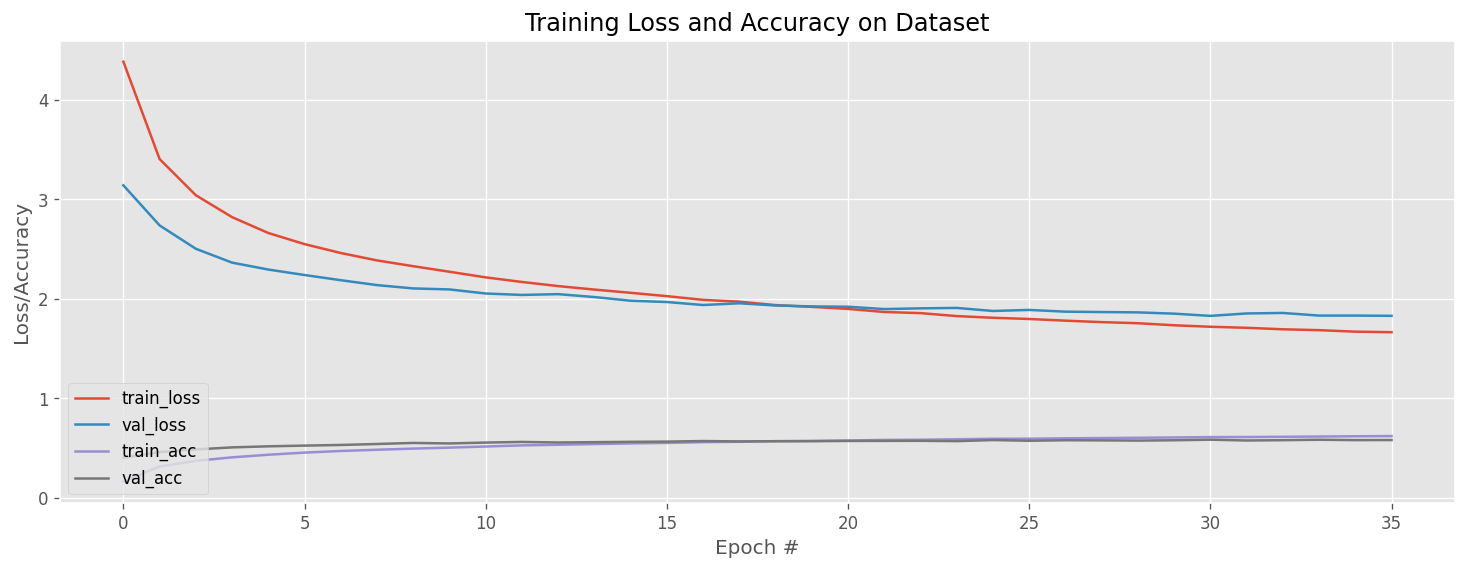

In [36]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = pre_trained_model.predict(x_te, batch_size=128)
# Sacamos el report para test
print(classification_report(y_te.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

num_epochs = len(H_pre.history["loss"])  # Obtén el número de épocas realmente entrenadas


# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H_pre.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H_pre.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, num_epochs), H_pre.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, num_epochs), H_pre.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

### Conclusion Analisis MobileNetV2

Una vez realizado el entrenamiento de nuestro modelo aplicando Data Augmentation obtenemos lo siguiente:

Epoch 51/100
1054/1054 [==============================] - 66s 62ms/step - loss: 1.5416 - accuracy: 0.6453 - val_loss: 1.8035 - val_accuracy: 0.5873

Modelo con un accuracy bastante aceptable en el que se ha reducido el overfitting en gran medida y con un amplia gama de pruebas realizadas.

## Estrategia 2: Densenet121


In [37]:
# Se realizara un analisis de la segunda estrategiade haciendo uso de la arquitectura
#de red preentrenada Densenet121
#Para las acciones de preprocesado y Densenet121 function se ha tenido la documentacion que a continuacion detallamos
# https://keras.io/api/applications/densenet/#densenet121-function

###Cargando el conjunto de datos CIFAR 100

In [38]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar100.load_data(label_mode="fine")

In [39]:
# CIFAR100 labelnames
labelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

In [40]:
len(labelNames)

100

### Redimensionado de imagenes

A diferencia de MobilenetV2 es una arquitectura mucho mas compleja y requiere de mayor requerimientos computaciones para su funcionamiento.

A pesar de contar con Google Colab Pro el resize lo pudimos llevar a 64 pixeles, aunque la arquitectura aconseja una resolucion de 224 x 224.

Si hubiesemos contado con mayor GPU los resultados serian significativamente mejores.

In [41]:
#Redimensionar las imágenes a 64x64 o al tamaño deseado
x_train_resized = tf.image.resize(x_train, [64, 64]).numpy()
x_test_resized = tf.image.resize(x_test, [64, 64]).numpy()

###Preprocesado


In [42]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess_input

In [43]:
#Pre-procesado obligatorio cuando trabajo con redes neuronales

x_train= densenet_preprocess_input(x_train_resized)
x_te = densenet_preprocess_input(x_test_resized)

# One-hot encoding para minimizar error
y_train= to_categorical(y_train, num_classes=100)
y_te = to_categorical(y_test, num_classes=100)

#Particion de los datos
x_tr, x_val, y_tr, y_val = train_test_split(x_train,y_train,test_size=0.1, random_state=42)

print("split")
print("Datos de training : ", x_tr.shape[0])
print("Datos de validation : ", x_val.shape[0])


split
Datos de training :  45000
Datos de validation :  5000


In [44]:
print(y_tr[81]) #check de posicion random numero 81 (después)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0.]


In [45]:
print(y_tr[81].argmax(axis=0)) #estamos pasando de binario a decimal

98


### 1° Analisis DensetNet121 (Transfer Learning) + Top Model + Entrenamiento

In [46]:
#Base Model DenseNet121
base_model = DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(64, 64, 3))

29084464/29084464 [==============================] - 0s 0us/step


In [47]:
# Base Model + Top Model
base_model.trainable = False    #accion de congelado de la parte de base model
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())

pre_trained_model.add(Dense(512, activation='relu'))
pre_trained_model.add(Dense(256, activation='relu'))
pre_trained_model.add(Dense(100, activation='softmax'))

pre_trained_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               2097664   
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 100)               25700     
                                                                 
Total params: 9292196 (35.45 MB)
Trainable params: 2254692 (8.60 MB)
Non-trainable params: 7037504 (26.85 MB)
_________________________________________________________________


In [48]:
# Compilamos el modelo
print("[INFO]: Compilando el modelo...")
pre_trained_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0005), metrics=["accuracy"])

[INFO]: Compilando el modelo...


In [49]:
# Entrenamiento del modelo usando el generador de aumento de datos
H_pre = pre_trained_model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=15, batch_size=128)


Epoch 1/15
352/352 [==============================] - 30s 57ms/step - loss: 2.4026 - accuracy: 0.4007 - val_loss: 1.8847 - val_accuracy: 0.4972
Epoch 2/15
352/352 [==============================] - 11s 32ms/step - loss: 1.6365 - accuracy: 0.5499 - val_loss: 1.7522 - val_accuracy: 0.5224
Epoch 3/15
352/352 [==============================] - 11s 32ms/step - loss: 1.3826 - accuracy: 0.6085 - val_loss: 1.7372 - val_accuracy: 0.5400
Epoch 4/15
352/352 [==============================] - 11s 32ms/step - loss: 1.2006 - accuracy: 0.6535 - val_loss: 1.7083 - val_accuracy: 0.5394
Epoch 5/15
352/352 [==============================] - 11s 32ms/step - loss: 1.0381 - accuracy: 0.6941 - val_loss: 1.7446 - val_accuracy: 0.5438
Epoch 6/15
352/352 [==============================] - 11s 32ms/step - loss: 0.8808 - accuracy: 0.7365 - val_loss: 1.8054 - val_accuracy: 0.5428
Epoch 7/15
352/352 [==============================] - 11s 32ms/step - loss: 0.7408 - accuracy: 0.7762 - val_loss: 1.8203 - val_accuracy:

[INFO]: Evaluando el modelo...
79/79 [==============================] - 6s 49ms/step
               precision    recall  f1-score   support

        apple       0.84      0.75      0.79       100
aquarium_fish       0.61      0.65      0.63       100
         baby       0.53      0.37      0.44       100
         bear       0.44      0.35      0.39       100
       beaver       0.30      0.36      0.33       100
          bed       0.58      0.39      0.47       100
          bee       0.39      0.68      0.50       100
       beetle       0.61      0.55      0.58       100
      bicycle       0.85      0.53      0.65       100
       bottle       0.69      0.67      0.68       100
         bowl       0.46      0.31      0.37       100
          boy       0.36      0.33      0.35       100
       bridge       0.50      0.68      0.58       100
          bus       0.49      0.45      0.47       100
    butterfly       0.68      0.32      0.44       100
        camel       0.34      0.62

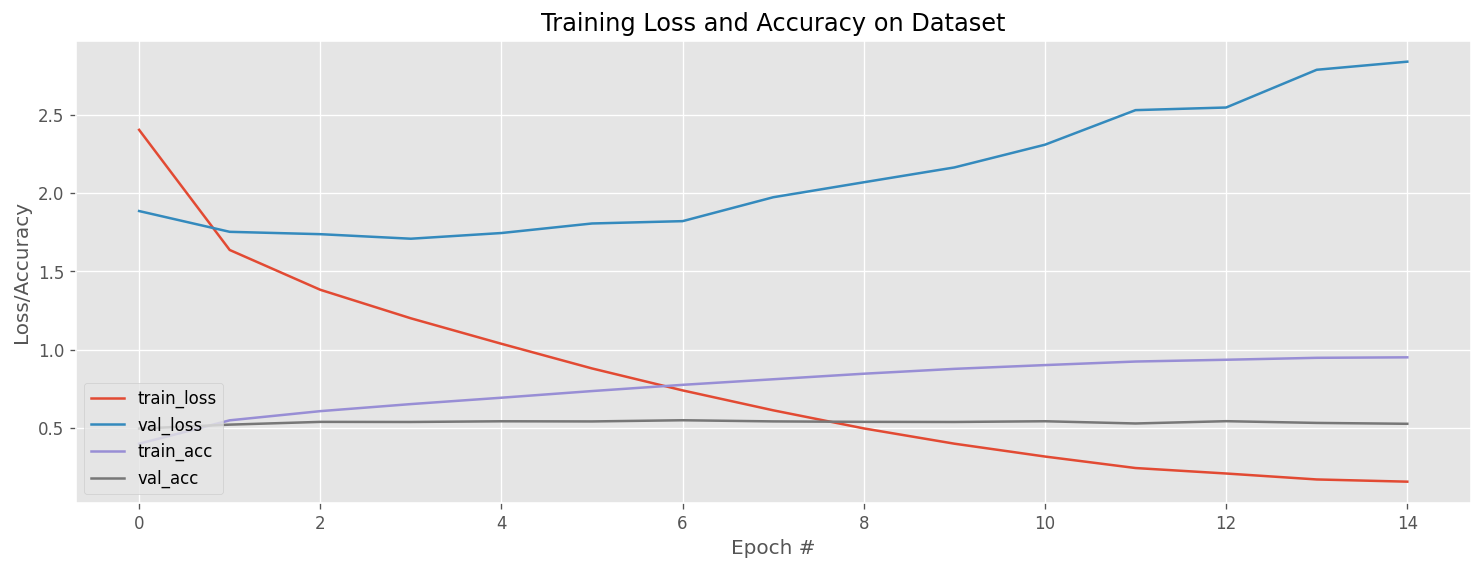

In [50]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = pre_trained_model.predict(x_te, batch_size=128)
# Sacamos el report para test
print(classification_report(y_te.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

num_epochs = len(H_pre.history["loss"])  # número de épocas realmente entrenadas


# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H_pre.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H_pre.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, num_epochs), H_pre.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, num_epochs), H_pre.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()


Observamos que los valores "loss" y "acc" estan muy lejos de converger con diferencias evidentes se debe al overfitting que se muestra graficamente.


Epoch 15/15
352/352 [==============================] - 16s 45ms/step - loss: 0.1600 - accuracy: 0.9508 - val_loss: 2.9577 - val_accuracy: 0.5358

###2° Analisis con mejoras efectuadas

In [51]:
# Base model + Top Model
base_model.trainable = False
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(GlobalAveragePooling2D())
pre_trained_model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.000005)))
pre_trained_model.add(Dropout(0.3)) # Aumentar el Dropout
pre_trained_model.add(Dense(512, activation='relu', kernel_regularizer=l1(0.00005))) # Regularización L2 más fuerte
pre_trained_model.add(Dropout(0.25)) # Aumentar el Dropout
pre_trained_model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.0005)))
pre_trained_model.add(Dropout(0.2))

pre_trained_model.add(Dense(100, activation='softmax'))

#Esquema Base Model + Top Model
pre_trained_model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_6 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                      

In [52]:
# Compilamos el modelo
print("[INFO]: Compilando el modelo...")
pre_trained_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

[INFO]: Compilando el modelo...


In [53]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Factor de aumento de datos
data_aug_factor = 4

# generador de aumento de datos -ImageDataGenerator-
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.10,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Subset obtenido en train_test_split y por ello no lo incluimos en esta seccion

train_generator = datagen.flow(
  x_tr,
  y_tr,
  batch_size=128
  )

validation_generator = datagen.flow(
  x_val,
  y_val,
  batch_size=128
  )


# Pasos por época para el entrenamiento
steps_per_epoch = (x_tr.shape[0] * data_aug_factor) // 128
steps_per_epoch_val = (x_val.shape[0] * data_aug_factor) // 128

# Entrenamiento del modelo usando el generador de aumento de datos
H_pre= pre_trained_model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data = validation_generator,
    validation_steps = steps_per_epoch_val,
    epochs=50,
    callbacks=[early_stopping],
    workers=4,
    use_multiprocessing=True  # Si el sistema lo permite, esto puede acelerar el procesamiento
)

Epoch 1/50
1406/1406 [==============================] - 161s 108ms/step - loss: 4.2509 - accuracy: 0.2218 - val_loss: 3.1622 - val_accuracy: 0.4192
Epoch 2/50
1406/1406 [==============================] - 150s 106ms/step - loss: 3.2504 - accuracy: 0.3799 - val_loss: 2.8193 - val_accuracy: 0.4705
Epoch 3/50
1406/1406 [==============================] - 153s 108ms/step - loss: 2.9285 - accuracy: 0.4328 - val_loss: 2.6273 - val_accuracy: 0.5013
Epoch 4/50
1406/1406 [==============================] - 147s 104ms/step - loss: 2.7259 - accuracy: 0.4635 - val_loss: 2.5099 - val_accuracy: 0.5135
Epoch 5/50
1406/1406 [==============================] - 149s 106ms/step - loss: 2.5672 - accuracy: 0.4878 - val_loss: 2.3969 - val_accuracy: 0.5302
Epoch 6/50
1406/1406 [==============================] - 153s 108ms/step - loss: 2.4398 - accuracy: 0.5041 - val_loss: 2.3127 - val_accuracy: 0.5385
Epoch 7/50
1406/1406 [==============================] - 153s 108ms/step - loss: 2.3307 - accuracy: 0.5198 - val_

[INFO]: Evaluando el modelo...
79/79 [==============================] - 4s 25ms/step
               precision    recall  f1-score   support

        apple       0.80      0.83      0.81       100
aquarium_fish       0.75      0.69      0.72       100
         baby       0.53      0.52      0.53       100
         bear       0.52      0.50      0.51       100
       beaver       0.38      0.38      0.38       100
          bed       0.60      0.58      0.59       100
          bee       0.63      0.74      0.68       100
       beetle       0.68      0.65      0.67       100
      bicycle       0.78      0.70      0.74       100
       bottle       0.83      0.65      0.73       100
         bowl       0.49      0.47      0.48       100
          boy       0.40      0.40      0.40       100
       bridge       0.76      0.64      0.70       100
          bus       0.49      0.55      0.52       100
    butterfly       0.67      0.58      0.62       100
        camel       0.55      0.58

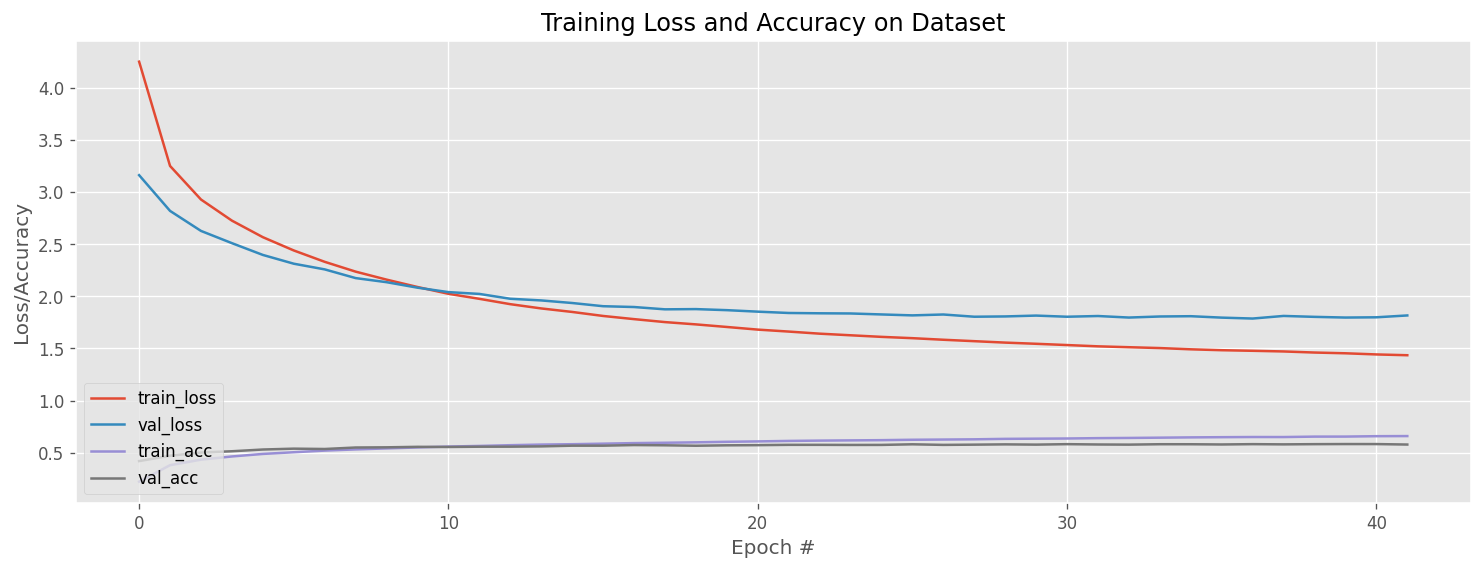

In [55]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = pre_trained_model.predict(x_te, batch_size=128)
# Sacamos el report para test
print(classification_report(y_te.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

num_epochs = len(H_pre.history["loss"])  # número de épocas realmente entrenadas


# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H_pre.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H_pre.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, num_epochs), H_pre.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, num_epochs), H_pre.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

#### Conclusion realizado 2° Analisis

Los resultados son significativamente mejores, especialmente en la mejora del overfitting debido a la aplicacion,entre otros cambios,principalmente del **data augmentation** , en el que se realiza el aumento de imagenes sinteticas (datos).


Epoch 37/50
1406/1406 [==============================] - 92s 65ms/step - loss: 1.4699 - accuracy: 0.6514 - val_loss: 1.7949 - val_accuracy: 0.5822

### 3° Analisis Aplicando FineTunnig - Descongelando bloques convolucionales

In [56]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar100.load_data(label_mode="fine")

In [57]:
# CIFAR100 labelnames
labelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

In [58]:
#Redimensionar las imágenes a 64x64 o al tamaño deseado
x_train_resized = tf.image.resize(x_train, [64, 64]).numpy()
x_test_resized = tf.image.resize(x_test, [64, 64]).numpy()

In [59]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess_input
#Pre-procesado

x_train= densenet_preprocess_input(x_train_resized)
x_te = densenet_preprocess_input(x_test_resized)

# One-hot encoding para minimizar error
y_train= to_categorical(y_train, num_classes=100)
y_te = to_categorical(y_test, num_classes=100)

#Particion de los datos
x_tr, x_val, y_tr, y_val = train_test_split(x_train,y_train,test_size=0.1, random_state=42)

print("split")
print("Datos de training : ", x_tr.shape[0])
print("Datos de validation : ", x_val.shape[0])


split
Datos de training :  45000
Datos de validation :  5000


In [60]:
base_model = DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(64, 64, 3))

In [61]:
# Mostramos la arquitectura
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 70, 70, 3)            0         ['input_3[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 32, 32, 64)           9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 32, 32, 64)           256       ['conv1/conv[0][0]']

#### Proceso FineTunning

In [62]:
# Por defecto todas las capas estás a layer.trainable = True (entrenables)
#Iremos congelando de izquierda a derecha para dejar las capas en "No Entrenables"

# En base_model.layers.name tenemos la información del nombre de la capa
for layer in base_model.layers:
  if layer.name == 'conv5_block16_1_conv':
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada...')

Capa input_3 congelada...
Capa zero_padding2d_2 congelada...
Capa conv1/conv congelada...
Capa conv1/bn congelada...
Capa conv1/relu congelada...
Capa zero_padding2d_3 congelada...
Capa pool1 congelada...
Capa conv2_block1_0_bn congelada...
Capa conv2_block1_0_relu congelada...
Capa conv2_block1_1_conv congelada...
Capa conv2_block1_1_bn congelada...
Capa conv2_block1_1_relu congelada...
Capa conv2_block1_2_conv congelada...
Capa conv2_block1_concat congelada...
Capa conv2_block2_0_bn congelada...
Capa conv2_block2_0_relu congelada...
Capa conv2_block2_1_conv congelada...
Capa conv2_block2_1_bn congelada...
Capa conv2_block2_1_relu congelada...
Capa conv2_block2_2_conv congelada...
Capa conv2_block2_concat congelada...
Capa conv2_block3_0_bn congelada...
Capa conv2_block3_0_relu congelada...
Capa conv2_block3_1_conv congelada...
Capa conv2_block3_1_bn congelada...
Capa conv2_block3_1_relu congelada...
Capa conv2_block3_2_conv congelada...
Capa conv2_block3_concat congelada...
Capa conv

In [63]:
# Base Model + TopModel

pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(GlobalAveragePooling2D())
pre_trained_model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.0005)))
pre_trained_model.add(Dropout(0.40)) # Aumentar el Dropout
pre_trained_model.add(Dense(512, activation='relu', kernel_regularizer=l1(0.0005))) # Regularización L2 más fuerte
pre_trained_model.add(Dropout(0.30)) # Aumentar el Dropout
pre_trained_model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.005)))
pre_trained_model.add(Dropout(0.20))

pre_trained_model.add(Dense(100, activation='softmax'))

#Esquema Base Model + Top Model
pre_trained_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 global_average_pooling2d_1  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_10 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_11 (Dense)            (None, 512)               524800    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                      

In [64]:
# Compilamos el modelo
print("[INFO]: Compilando el modelo...")
pre_trained_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

[INFO]: Compilando el modelo...


In [65]:
# Entrenamiento del modelo usando el generador de aumento de datos
H_pre = pre_trained_model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=20, batch_size=128)


Epoch 1/20
352/352 [==============================] - 24s 43ms/step - loss: 13.1738 - accuracy: 0.0843 - val_loss: 10.5883 - val_accuracy: 0.3260
Epoch 2/20
352/352 [==============================] - 12s 35ms/step - loss: 9.7512 - accuracy: 0.2738 - val_loss: 8.2551 - val_accuracy: 0.4430
Epoch 3/20
352/352 [==============================] - 12s 35ms/step - loss: 7.9306 - accuracy: 0.3582 - val_loss: 6.8964 - val_accuracy: 0.4848
Epoch 4/20
352/352 [==============================] - 12s 35ms/step - loss: 6.7209 - accuracy: 0.4088 - val_loss: 5.9003 - val_accuracy: 0.5168
Epoch 5/20
352/352 [==============================] - 12s 35ms/step - loss: 5.7811 - accuracy: 0.4449 - val_loss: 5.1169 - val_accuracy: 0.5366
Epoch 6/20
352/352 [==============================] - 13s 36ms/step - loss: 5.0342 - accuracy: 0.4725 - val_loss: 4.4884 - val_accuracy: 0.5480
Epoch 7/20
352/352 [==============================] - 13s 36ms/step - loss: 4.4443 - accuracy: 0.4881 - val_loss: 4.0036 - val_accurac

[INFO]: Evaluando el modelo...
79/79 [==============================] - 4s 24ms/step
               precision    recall  f1-score   support

        apple       0.86      0.78      0.82       100
aquarium_fish       0.56      0.68      0.62       100
         baby       0.49      0.49      0.49       100
         bear       0.37      0.32      0.34       100
       beaver       0.32      0.23      0.27       100
          bed       0.58      0.50      0.54       100
          bee       0.54      0.56      0.55       100
       beetle       0.55      0.45      0.49       100
      bicycle       0.71      0.67      0.69       100
       bottle       0.84      0.66      0.74       100
         bowl       0.43      0.43      0.43       100
          boy       0.31      0.47      0.37       100
       bridge       0.57      0.69      0.63       100
          bus       0.44      0.48      0.46       100
    butterfly       0.71      0.52      0.60       100
        camel       0.44      0.57

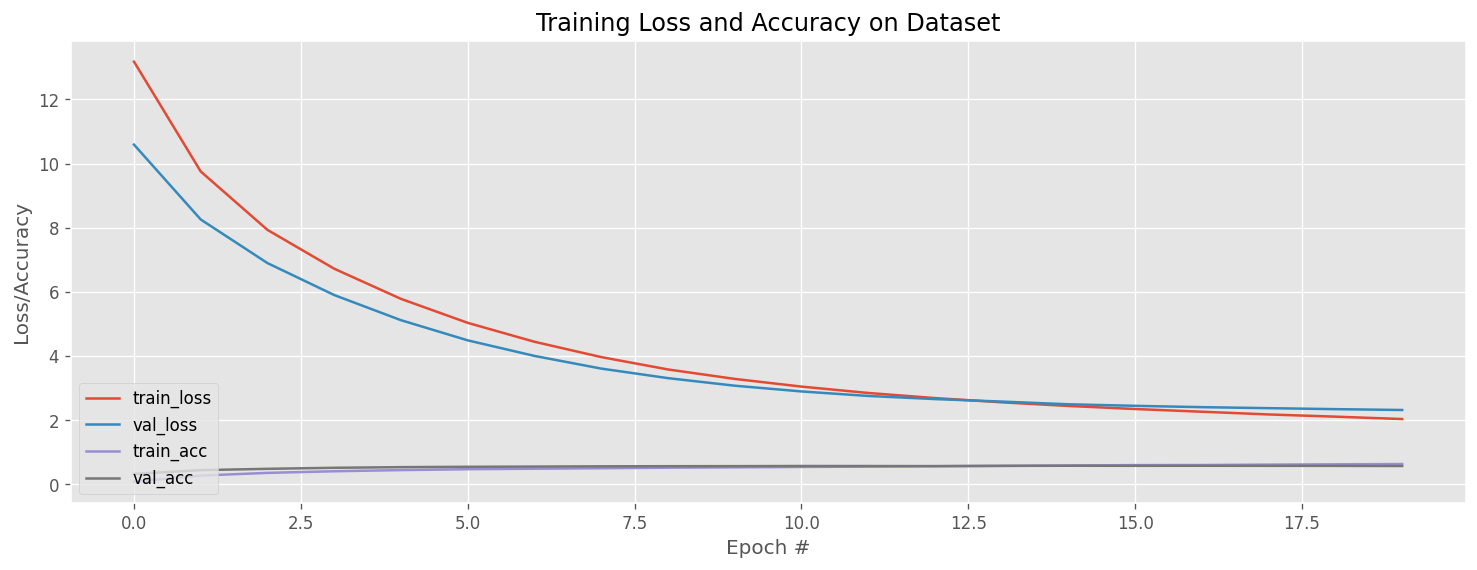

In [66]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = pre_trained_model.predict(x_te, batch_size=128)
# Sacamos el report para test
print(classification_report(y_te.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

num_epochs = len(H_pre.history["loss"])  # Obtén el número de épocas realmente entrenadas


# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H_pre.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H_pre.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, num_epochs), H_pre.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, num_epochs), H_pre.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

#### Conclusiones al aplicar FineTuning Vs Data Augmentation

A pesar de que el modelo aplicado el FineTunnig tiene un diferencial menor entre la precisión de entrenamiento y validación, el modelo aplicado DataAugmentation aún es superior debido a su mayor precisión general y menor pérdida en la validación, indicando un mejor rendimiento y generalización.

### Comparacion Estrategia 1 Vs Estrategia 2

Comparando ambos modelos:

- DenseNet parece tener un rendimiento global mejor en términos de accuracy, precision, recall y F1-score en comparación con MobileNet en este conjunto de datos específico.

- DenseNet tiene un mayor promedio ponderado de precisión, recall y F1-score, lo que indica una mejora general en comparación con MobileNet.

En general, Ambas arquitecturas tienen un rendimiento similar. DenseNet parece ser la opción preferida en este caso particular basándonos en las métricas proporcionadas.

#2.Entrenar desde cero o from scratch

In [67]:
# En esta estrategia hemos decidido utilizar API Funcional ya que en la estrategia 1 utilizamos la API Secuencial
# con redes convolucionales

###Cargando el conjunto de datos CIFAR 100

In [68]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar100.load_data(label_mode="fine")

In [69]:
# CIFAR100 labelnames
labelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

### Preprocesado

In [70]:
#Normalizamos los datos a 0´s 1´s
x_train= x_train / 255
x_te = x_test / 255

# One-hot encoding para minimizar error
y_train= to_categorical(y_train, num_classes=100)
y_te = to_categorical(y_test, num_classes=100)


#Aqui obtenemos el split de validation con datos preprocesados, realizamos la separacion de la parte de validation
x_tr, x_val, y_tr, y_val = train_test_split(x_train,y_train,test_size=0.1, random_state=42)



### Creando la topología de red neuronal : CNN utilizando API FUNCIONAL

In [71]:
## La realizacion de la red neuronal se utilizaron:

# 1.Capas convolucionales donde definimos las neuronas, los filtros y la funcion de activacion.
#   Se hace uso en dichas capas del parametro strides=(1, 1)-->significa que el filtro se mueve un píxel a la vez, sin saltarse ninguno
#    strides=(1, 1):Define el paso con el que se moverá el filtro sobre la imagen
#   (3, 3)  -- tamaño del filtro
#   padding='same': Significa que se aplicará padding para mantener la dimensión espacial de la salida igual a la de la entrada

# 2. MaxPooling2D Es una capa que realiza una operación de max pooling con una ventana de 2x2
 #sobre la entrada. La operación de pooling reduce la dimensión espacial (el ancho y el alto,
# pero no la profundidad) de la entrada tomando el valor máximo de la ventana de pooling y
# produciendo una salida más pequeña.
#   (2, 2): Es el tamaño de la ventana de pooling. En este caso, se toma el máximo
#           de cada submatriz de 2x2 de la entrada.

# 3. DropOut , el parametro de dropout lo hemos ido modificando (desactivar neuronas) en las diversas pruebas que se han realizado
#    para ir reduciendo el overfitting.

# 4. BatchNormalization , se añadio para ayudar a corregir el entrenamiento


In [72]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Definimos entradas del modelo
inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))

# Primer bloque CNN
x = Conv2D(128, (3, 3), padding='same', activation='relu')(inputs)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.20)(x)

# Segundo bloque CNN
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.20)(x)

# Tercer bloque CNN
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

# Capa flatten
x = Flatten()(x)

# Capa densa (dos capas densas)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
output = Dense(len(labelNames), activation='softmax')(x)


# Generamos el modelo
model = Model(inputs=inputs, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 128)       512       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 128)       0     

### Compilacion y entrenamiento de la red neuronal

In [73]:
# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

[INFO]: Compilando el modelo...


In [74]:
model_CNN = model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=30, batch_size=128)

Epoch 1/30


2024-02-07 20:56:54.977438: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


352/352 [==============================] - 20s 34ms/step - loss: 4.2849 - accuracy: 0.0803 - val_loss: 5.4053 - val_accuracy: 0.0178
Epoch 2/30
352/352 [==============================] - 10s 30ms/step - loss: 3.5741 - accuracy: 0.1580 - val_loss: 3.2088 - val_accuracy: 0.2190
Epoch 3/30
352/352 [==============================] - 10s 29ms/step - loss: 3.2161 - accuracy: 0.2149 - val_loss: 2.9643 - val_accuracy: 0.2616
Epoch 4/30
352/352 [==============================] - 10s 30ms/step - loss: 2.9383 - accuracy: 0.2656 - val_loss: 2.7293 - val_accuracy: 0.3092
Epoch 5/30
352/352 [==============================] - 11s 30ms/step - loss: 2.7009 - accuracy: 0.3066 - val_loss: 2.4624 - val_accuracy: 0.3596
Epoch 6/30
352/352 [==============================] - 10s 30ms/step - loss: 2.5334 - accuracy: 0.3405 - val_loss: 2.4312 - val_accuracy: 0.3676
Epoch 7/30
352/352 [==============================] - 10s 29ms/step - loss: 2.4092 - accuracy: 0.3672 - val_loss: 2.2935 - val_accuracy: 0.3908
Epo

[INFO]: Evaluando el modelo...
79/79 [==============================] - 1s 8ms/step
               precision    recall  f1-score   support

        apple       0.76      0.81      0.78       100
aquarium_fish       0.42      0.75      0.54       100
         baby       0.44      0.30      0.36       100
         bear       0.31      0.35      0.33       100
       beaver       0.35      0.24      0.28       100
          bed       0.45      0.63      0.53       100
          bee       0.41      0.73      0.52       100
       beetle       0.70      0.35      0.47       100
      bicycle       0.67      0.66      0.67       100
       bottle       0.72      0.61      0.66       100
         bowl       0.40      0.34      0.37       100
          boy       0.41      0.12      0.19       100
       bridge       0.64      0.51      0.57       100
          bus       0.43      0.52      0.47       100
    butterfly       0.56      0.45      0.50       100
        camel       0.53      0.39 

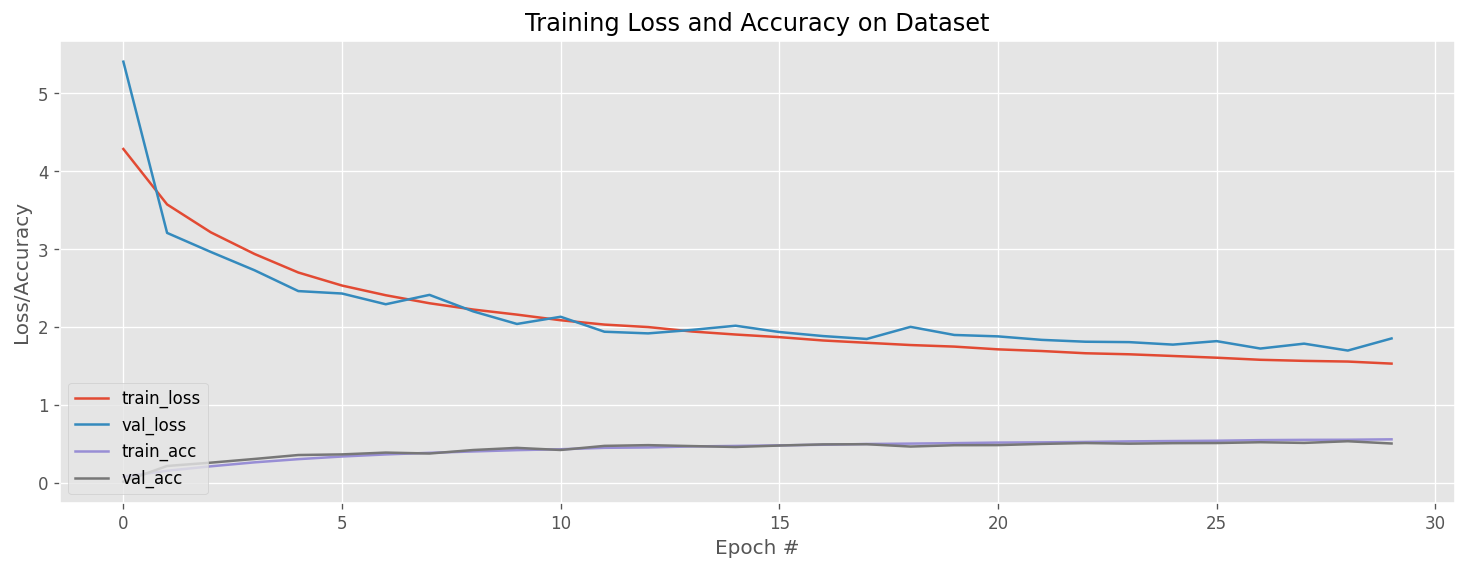

In [75]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model.predict(x_te, batch_size=128)
# Sacamos el report para test
print(classification_report(y_te.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

num_epochs = len(model_CNN.history["loss"])  #número de épocas realmente entrenadas


# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), model_CNN.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), model_CNN.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, num_epochs), model_CNN.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, num_epochs), model_CNN.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

##Evaluacion del modelo.

In [76]:
# Evaluamos el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
loss, accuracy = model.evaluate(x_te, y_te)
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
313/313 [==============================] - 2s 4ms/step - loss: 9.5947 - accuracy: 0.0526
Loss 9.594711303710938, accuracy 0.05260000005364418


## Aplicando DATA AUGMENTATION para corregir el overfitting

### Early Stopping

In [77]:
#Técnica utilizada en el entrenamiento de las redes neuronales, para la detección de la convergencia del entrenamiento o cuando se está muy cerca de ella.
#Esto es útil para evitar el sobreentrenamiento

#Parametros utilizados

#monitor --> cantidad a ser monitoreada

#patience-->número de épocas sin mejora después de las cuales se detendrá el entrenamiento.

#restore_best_weights -->si se deben restaurar los pesos del modelo de la época con el mejor valor de la cantidad monitoreada.
#                       Si es falso,se utilizan los pesos del modelo obtenidos en el último paso del entrenamiento.

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [78]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definimos el factor de aumento de datos
data_aug_factor = 6

# Generador de imágenes para tener un menor overfitting
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.01,
    zoom_range=[0.9, 1.25],
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='reflect'
)

#los subsets de train_generator y validation_generator son definidos en el entrenamiento posterior

train_generator = datagen.flow(
  x_tr,
  y_tr,
  batch_size=128
  )

validation_generator = datagen.flow(
  x_val,
  y_val,
  batch_size=128
  )


# Pasos por época para el entrenamiento
steps_per_epoch = (x_tr.shape[0] * data_aug_factor) // 128
steps_per_epoch_val = (x_val.shape[0] * data_aug_factor) // 128

# Entrenamiento del modelo usando el generador de aumento de datos
model_CNN= model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data = validation_generator,
    validation_steps = steps_per_epoch_val,
    epochs=20,
    callbacks=[early_stopping],
    workers=4,
    use_multiprocessing=True
)

Epoch 1/20


2024-02-07 21:03:51.817882: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


2109/2109 [==============================] - 128s 60ms/step - loss: 2.0091 - accuracy: 0.4534 - val_loss: 1.8721 - val_accuracy: 0.4917
Epoch 2/20
2109/2109 [==============================] - 118s 56ms/step - loss: 1.9235 - accuracy: 0.4729 - val_loss: 1.8615 - val_accuracy: 0.4951
Epoch 3/20
2109/2109 [==============================] - 117s 55ms/step - loss: 1.8713 - accuracy: 0.4844 - val_loss: 1.9096 - val_accuracy: 0.4858
Epoch 4/20
2109/2109 [==============================] - 117s 55ms/step - loss: 1.8344 - accuracy: 0.4922 - val_loss: 1.8308 - val_accuracy: 0.4987
Epoch 5/20
2109/2109 [==============================] - 125s 59ms/step - loss: 1.8014 - accuracy: 0.4997 - val_loss: 1.8163 - val_accuracy: 0.5069
Epoch 6/20
2109/2109 [==============================] - 115s 54ms/step - loss: 1.7635 - accuracy: 0.5097 - val_loss: 1.8484 - val_accuracy: 0.4994
Epoch 7/20
2109/2109 [==============================] - 121s 57ms/step - loss: 1.7355 - accuracy: 0.5155 - val_loss: 1.7748 - val

[INFO]: Evaluando el modelo...
79/79 [==============================] - 0s 6ms/step
               precision    recall  f1-score   support

        apple       0.84      0.87      0.86       100
aquarium_fish       0.62      0.68      0.65       100
         baby       0.51      0.39      0.44       100
         bear       0.39      0.28      0.33       100
       beaver       0.33      0.32      0.32       100
          bed       0.68      0.58      0.63       100
          bee       0.54      0.71      0.61       100
       beetle       0.47      0.59      0.52       100
      bicycle       0.55      0.75      0.63       100
       bottle       0.67      0.70      0.68       100
         bowl       0.52      0.33      0.40       100
          boy       0.45      0.35      0.39       100
       bridge       0.65      0.64      0.64       100
          bus       0.54      0.62      0.58       100
    butterfly       0.46      0.51      0.48       100
        camel       0.60      0.49 

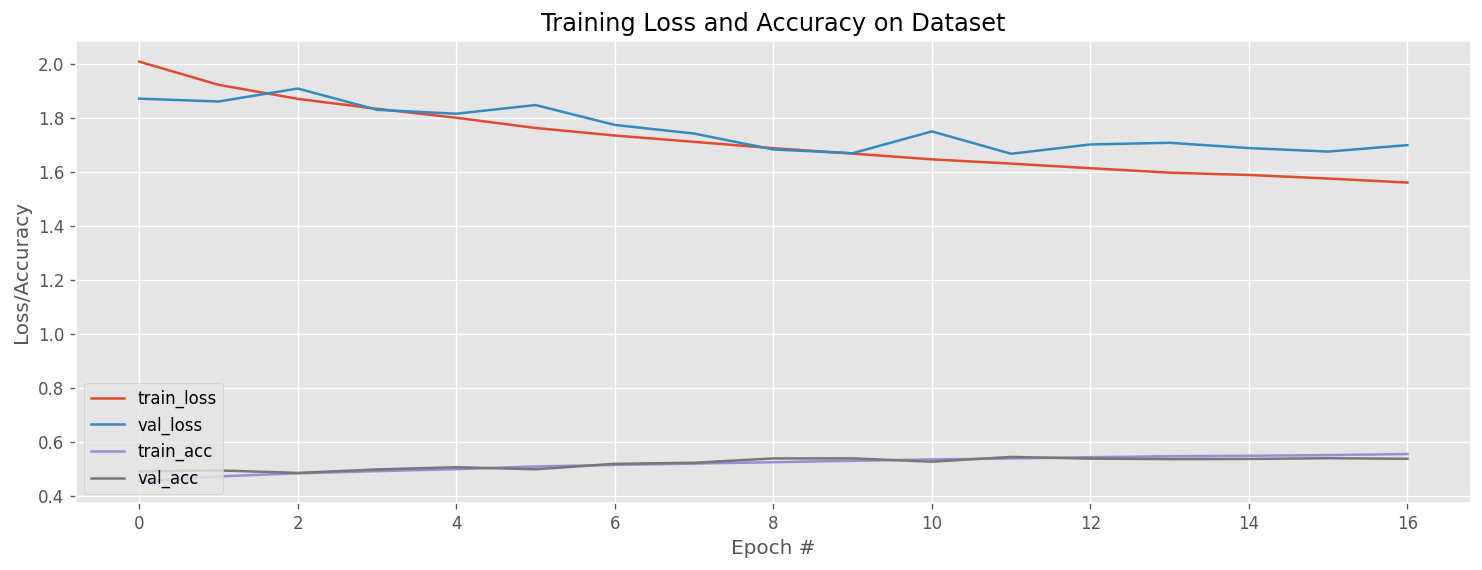

In [79]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model.predict(x_te, batch_size=128)
# Sacamos el report para test
print(classification_report(y_te.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

num_epochs = len(model_CNN.history["loss"])  # Obtén el número de épocas realmente entrenadas


# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), model_CNN.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), model_CNN.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, num_epochs), model_CNN.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, num_epochs), model_CNN.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [80]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
loss, accuracy = model.evaluate(x_te, y_te)
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
313/313 [==============================] - 1s 4ms/step - loss: 12.0946 - accuracy: 0.0568
Loss 12.094575881958008, accuracy 0.0568000003695488


## Conclusiones Red from Scratch

La aplicacion de la técnica de Data Augmentacion demuestra una reduccion en los valores de perdida y un aumento en el accuracy con respecto al analisis inicial.

Los valores de perdida tiene una tendencia a disminuir a medida que se aumente el numero de epochs.

La configuracion de Data Augmentation fue diferente que habiamos utilizado para las estrategia 1 (fill_mode='reflect' en lugar fill_mode='nearest' ).